# Titanic - Machine Learning from Disaster

- Experimental flow

1. Data exploration
2. Data preprocessing
3. Models developement
4. Training
5. Evaluation
6. Testing
7. Results
8. Discussion


### Upload data

In [32]:
import os

PATH = "C:/Users/Ato/Documents/Programming/Python/Titanic/data/"
training_file = "train.csv"
train_path = os.path.join(PATH,training_file)

In [33]:
import pandas as pd

train = pd.read_csv(train_path)
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Exploration

### General Exploration

In [34]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note**: On a first instance it is visible that most females survived and most males didn't, therefore this will be a valuable feature. As for the data types, there are integers, strings (text), floats, integers + strings (Ticket), and in some classes there are **NaN** values.

Because of this, hot-encoding or label-encoding will be applied in categorical classes such as 'Sex' and 'Embarked' and text-preprocessing techniques (tokenization, stemming, lemmatizing, )will be applied to convert classes such as 'Name' into a format suitable for analysis.

Each columns' **Nan** values will be treated differently.

- After some research, binary classes should not be hot-encoded since it leads to redundancies and in some aspects, they are already in a hot-encoded form (If I give you [(0, ), (1, )], you can know the complementary column [( , 1), ( , 0)]). Therefore, only a conversion from *string* to *binary* will be applied on this class

In [35]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

- Below it's observable that there are no missing values in the Sex class.

In [36]:
print(f'Number of rows: {len(train)}')

Number of rows: 891


In [37]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Sex and Survival relationship exploration

In [38]:
count_men = 0
count_women = 0

count_men_alive = 0
count_women_alive = 0

count_men_death = 0
count_women_death = 0

count_survival = 0
count_death = 0

number_of_passangers = len(train)

for i, survival in enumerate(train['Survived'], 0):

  if survival == 1:
    count_survival += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_alive += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_alive += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")
  
  else:
    count_death += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_death += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_death += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")

overall_survival_men = round((count_men_alive/number_of_passangers)*100,2)
overall_survival_women = round((count_women_alive/number_of_passangers)*100,2)

overall_death_men = round((count_men_death/number_of_passangers)*100,2)
overall_death_women = round((count_women_death/number_of_passangers)*100,2)

survival_among_men = round((count_men_alive/count_men)*100,2)
survival_among_women = round((count_women_alive/count_women)*100,2)

death_among_men = round((count_men_death/count_men)*100,2)
death_among_women = round((count_women_death/count_women)*100,2)

survival = round((count_survival/number_of_passangers)*100,2)

print(f"Number of passangers: {number_of_passangers}")
print(f"Number of men: {count_men}")
print(f"Number of women: {count_women}")
print(" ")
print(f"Deaths ALL: {count_death}")
print(f"Deaths MEN: {count_men_death}")
print(f"Deaths WOMAN: {count_women_death}")
print(" ")
print(f"Survived ALL: {count_survival}")
print(f"Survived MEN: {count_men_alive}")
print(f"Survived WOMAN: {count_women_alive}")
print(" ")
print(f"Survival: {survival} %")
print(" ")
print(f"Overall survival MEN: {overall_survival_men} %")
print(f"Overall survival WOMEN: {overall_survival_women} %")
print(" ")
print(f"Survival among MEN: {survival_among_men} %")
print(f"Survival among WOMEN: {survival_among_women} %")
print(" ")
print(f"Overall deaths MEN: {overall_death_men} %")
print(f"Overall deaths WOMEN: {overall_death_women} %")
print(" ")
print(f"Deaths among MEN: {death_among_men} %")
print(f"Deaths among WOMEN: {death_among_women} %")




Number of passangers: 891
Number of men: 577
Number of women: 314
 
Deaths ALL: 549
Deaths MEN: 468
Deaths WOMAN: 81
 
Survived ALL: 342
Survived MEN: 109
Survived WOMAN: 233
 
Survival: 38.38 %
 
Overall survival MEN: 12.23 %
Overall survival WOMEN: 26.15 %
 
Survival among MEN: 18.89 %
Survival among WOMEN: 74.2 %
 
Overall deaths MEN: 52.53 %
Overall deaths WOMEN: 9.09 %
 
Deaths among MEN: 81.11 %
Deaths among WOMEN: 25.8 %


#### Useful insights

From the analysis above the following points can be extracted (some of them are useful for feature engineering and some are just interesting and curious):

- More than half of the people died (~61%)
- Among the men, 81 % died, 468 out of 549. **(This can be useful so as if 'Sex' is a man, 'Survival' is probably 0)**
- Among women, 74 % survived, 233 out of 314 **(This can be useful so as if 'Sex' is a woman, 'Survival' is probably 1)**

Now it would be interesting to make the same analysis with the 'Age' cass and observe if young people survived more than older ones.

### Age and Survival relationship analysis

#### Missing Values

First of all let's analyse the basic informationof this feature:

Looking at the descriptive table below, many things can be already known with ease:

- Since count = 714 and the number of passangers is 891, there are 177 **missing values**.
- The mean age of the people is 29 (quite young).
- Most of the people is under 40.
- The older person is 80 yo.

In [39]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Recheck NaN values

- Comprehension lists

In [40]:
null_values = sum([1 for value in train['Age'].isnull() if value])
null_values

177

- Pandas

In [41]:
null_values = train['Age'].isnull().values.sum() #  Indicates whether there are any missing values (True) or not (False)
null_values

177

##### Dealing with Missing data in 'Age'

In [42]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

- Making sure there are no missing values anymore

In [43]:
train['Age'].isnull().values.any()

False

### Analysing 'Age' by group of ages

Since Titanic sank in 1912, age ranges are designed according to the same period:

- Infant: [0, 2] years old
- Child: (2, 12] years old
- Adolescent: (12, 18] years old
- Young: (18, 25] years old
- Middle-aged: (25, 40] years old -> added because most of the people falls here
- Adult: (40, 60] years old 
- Elderly: (60+) years old



In [46]:
infant = []
child = []
adolescent = []
young = []
middle_aged_young = []
middle_aged_adult = []
adult = []
elder = []

for age in train['Age']:
  if age <= 2:
    infant.append(age)
  elif 2 < age <= 12:
    child.append(age)
  elif 12 < age <= 18:
    adolescent.append(age)
  elif 18 < age <= 25:
    young.append(age)
  elif 25 < age <= 35:
    middle_aged_young.append(age)
  elif 35 < age <= 45:
    middle_aged_adult.append(age)
  elif 45 < age <= 60:
    adult.append(age)
  else:
    elder.append(age)

In [54]:
print(f"Number of infants: {len(infant)}; Overall: {round((len(infant)/number_of_passangers)*100, 2)} %")
print(f"Number of child: {len(child)}; Overall: {round((len(child)/number_of_passangers)*100, 2)} %")
print(f"Number of adolescent: {len(adolescent)}; Overall: {round((len(adolescent)/number_of_passangers)*100, 2)} %")
print(f"Number of young: {len(young)}; Overall: {round((len(young)/number_of_passangers)*100, 2)} %")
print(f"Number of middle aged young: {len(middle_aged_young)}; Overall: {round((len(middle_aged_young)/number_of_passangers)*100, 2)} %")
print(f"Number of middle aged adult: {len(middle_aged_adult)}; Overall: {round((len(middle_aged_adult)/number_of_passangers)*100, 2)} %")
print(f"Number of adult: {len(adult)}; Overall: {round((len(adult)/number_of_passangers)*100, 2)} %")
print(f"Number of elder: {len(elder)}; Overall: {round((len(elder)/number_of_passangers)*100, 2)} %")

Number of infants: 24; Overall: 2.69 %
Number of child: 45; Overall: 5.05 %
Number of adolescent: 70; Overall: 7.86 %
Number of young: 162; Overall: 18.18 %
Number of middle aged young: 373; Overall: 41.86 %
Number of middle aged adult: 114; Overall: 12.79 %
Number of adult: 81; Overall: 9.09 %
Number of elder: 22; Overall: 2.47 %


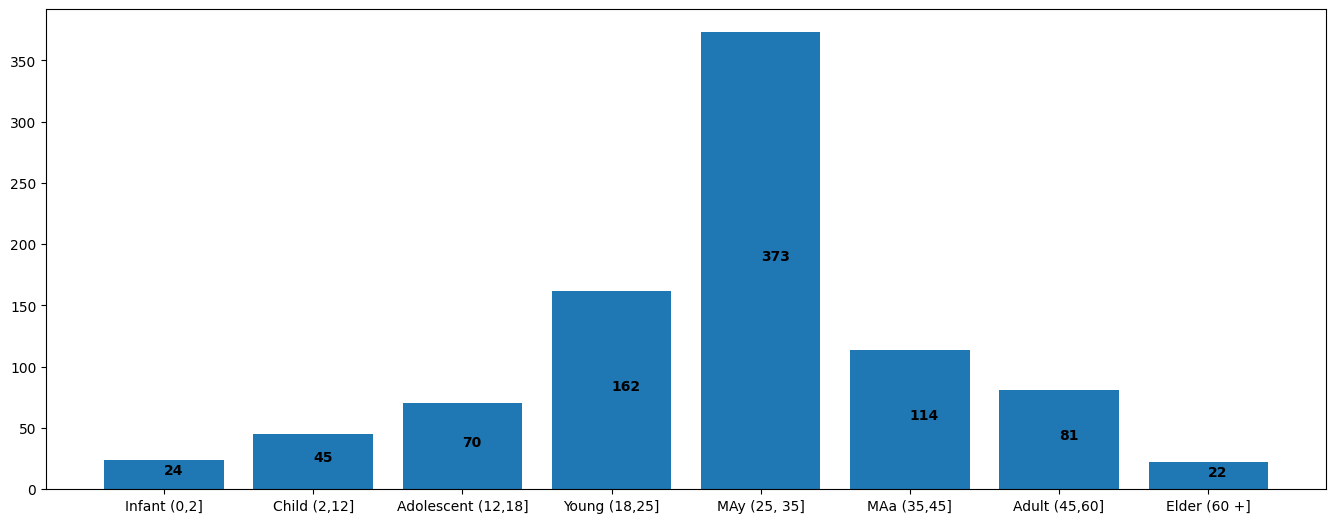

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ages = ['Infant (0,2]', 'Child (2,12]', 'Adolescent (12,18]', 'Young (18,25]', 'MAy (25, 35]', 'MAa (35,45]', 'Adult (45,60]', 'Elder (60 +]']
nages = [len(infant), len(child), len(adolescent), len(young), len(middle_aged_young), len(middle_aged_adult), len(adult), len(elder)]
ax.bar(ages, nages)

for idx, value in enumerate(nages):
  ax.text(idx, value/2, str(value), color = 'black', fontweight = 'bold')

plt.show()

Observing the bar plot above, it is clear that most of the peoples' age (41%) fell between 25 and 35 y.o. It would also be interesting to see how many females and males there are in each section. 

Meanwhile, the number of survivors for each cathegory will be analysed

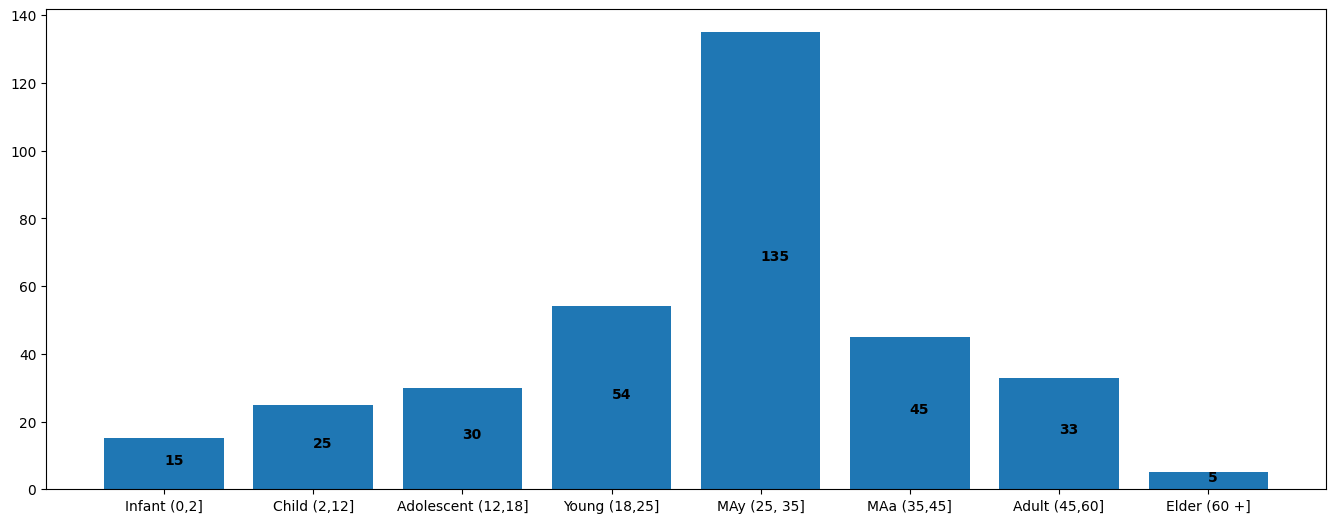

In [66]:
surv_infant = []
surv_child = []
surv_adolescent = []
surv_young = []
surv_middle_aged_young = []
surv_middle_aged_adult = []
surv_adult = []
surv_elder = []



for idx, age in enumerate(train["Age"]):
  if train["Survived"].iloc[idx] == 1:
      if age <= 2:
        surv_infant.append(age)
      elif 2 < age <= 12:
        surv_child.append(age)
      elif 12 < age <= 18:
        surv_adolescent.append(age)
      elif 18 < age <= 25:
        surv_young.append(age)
      elif 25 < age <= 35:
        surv_middle_aged_young.append(age)
      elif 35 < age <= 45:
        surv_middle_aged_adult.append(age)
      elif 45 < age <= 60:
        surv_adult.append(age)
      else:
        surv_elder.append(age)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
surv_nages = [len(surv_infant), len(surv_child), len(surv_adolescent), len(surv_young), len(surv_middle_aged_young), len(surv_middle_aged_adult), len(surv_adult), len(surv_elder)]
ax.bar(ages, surv_nages)

for idx, value in enumerate(surv_nages):
  ax.text(idx, value/2, str(value), color = 'black', fontweight = 'bold')
plt.show()

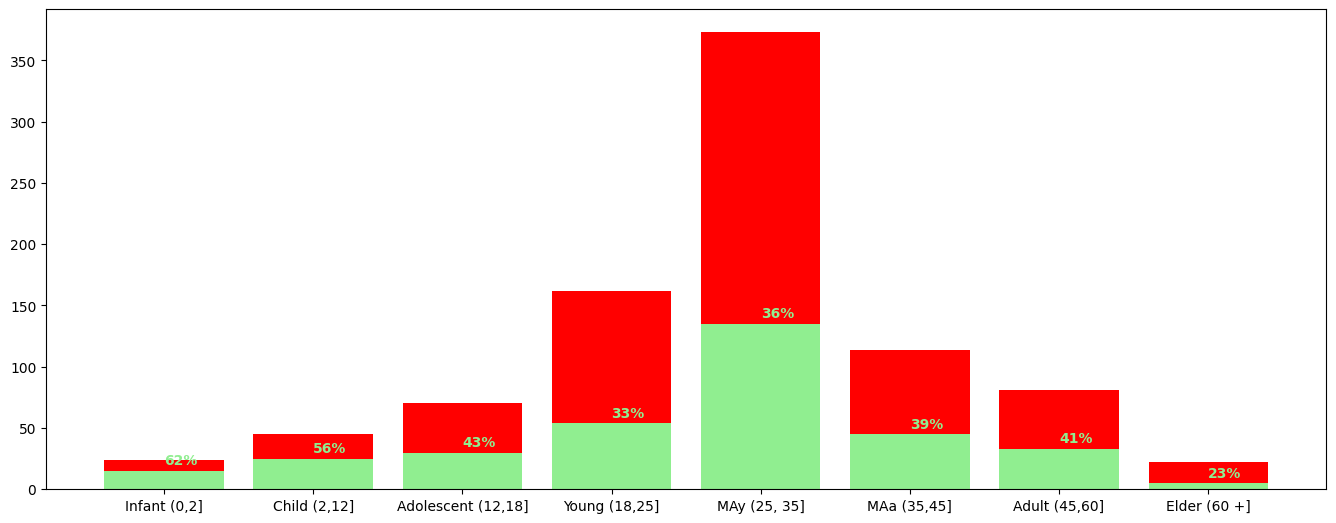

In [77]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

ax.bar(ages, nages, color='red')
ax.bar(ages, surv_nages, color='lightgreen')

for idx, value in enumerate(surv_nages):
  ax.text(idx, value+5, f'{str(round(value/nages[idx]*100))}%', color = 'lightgreen', fontweight = 'bold')

plt.show()

Insights from the 'Age' analysis:

- Most people is between 20 and 40 years old
- Elder people had less chance of survival while infants survived the most (in %, not number)
- Although in some cases it is possible to predict if the person survived or not with a big enough probability by just looking at the age (**elder** 23% of survival, 77% death or **Infant** 62% survival), other age ranges are more difficult to allocate with confidence.